# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())
print(data.head(10))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669   9656     7561     214              2674          1338
1   7057   9810     9568    1762              3293          1776
2   6353   8808     7684    2405              3516          7844
3  13265   1196     4221    6404               507          1788
4  22615   5410     7198    3915              1777          5185
5   9413   8259     5126     666              1795          1451
6  12126   3199     6975     480              3140           545
7   7579   4956     9426    1669              3321          2566
8   5963   3648     6192     425              1716           750
9   6006  11093    18881    1159              7425          2098


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [8,12,23]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5963,3648,6192,425,1716,750
1,31714,12319,11757,287,3881,2931
2,26373,36423,22019,5154,4337,16523


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
All spending values in the 5 categories are pretty skewed, with a larger proportion in the lower end and a long tail of strong buyers.

Customer 1(index 8) has the following profile: few fresh purchases, median milk purchases, below average grocery purchases, very little frozen, below average detergents and paper,  below average delicatessen. This customer is a rather small business, maybe a small cafe, as they buy comparatively much milk.

Customer 2(index 12) has the following profile: very many purchases in the fresh, milk, grocery and delicatessen categories (a large customer), about median level of detergents and paper purchases, but little frozen goods. This customer could be a medium to large restaurant, but no market, which would buy more evenly, also frozen goods.

Customer 3(index 23) has the following profile: very many purchases in the fresh, milk, grocery, frozen and detergents/paper categories (a large customer), but exceptionally many purchases in the delicatessen category. This customer could be a large gourmet restaurant, or a wholesale retailer specialized in delicatessen.



### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.

- Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
import sklearn.cross_validation as skl
import sklearn.tree as tr

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop(['Delicatessen'], axis = 1)

# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = skl.train_test_split(new_data,data['Delicatessen'], test_size=0.25, random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tr.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print (score)

-2.2547115372


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
I tried to predict the feature "Delicatessen". The reported score is ca. -2.25, which is really unexpected and bad for a measure of explained variance R².
This feature is necessary, as there is no way to predict this feature using the remaining features. So it is highly relevant.
I would not trust the regression results too much, as the data has a lot of outliers and regression / decision trees are prone to learning outliers and giving them too much influence.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/home/jstrebel/anaconda2/envs/customersegments/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


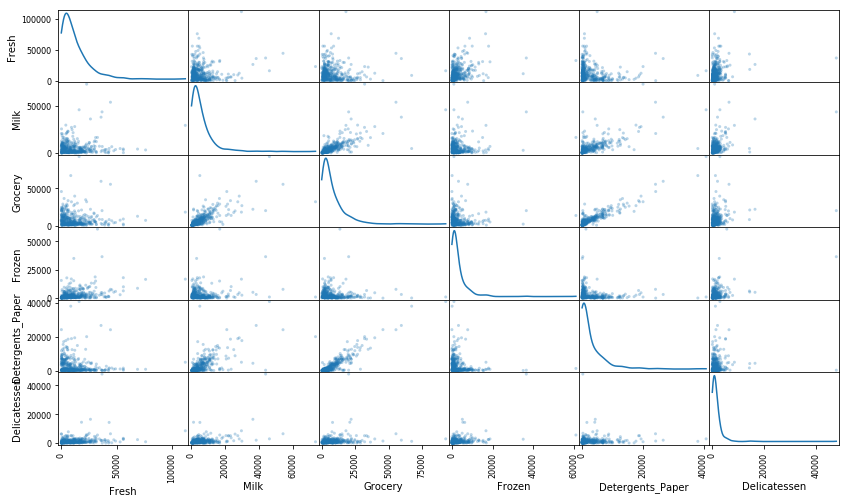

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
data.corr()

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**
- None of the features is normally distributed. Their distribution is highly right skewed. All distributions are long-tailed.
- All scatter plots show outliers.
- All scatter plots have most of their data points close to zero, which is likely if you combine two distributions with similar shape.
- The following scatter plots show visible correlations:
 - Grocery and Detergents_Paper
 - Grocery and Milk
 - Detergents_Paper and Milk
- As Delicatessen shows no visible correlations to the rest of the features, my assumption about its relevance is confirmed. This is also confirmed by the low correlation coefficients with the other features.


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

/home/jstrebel/anaconda2/envs/customersegments/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


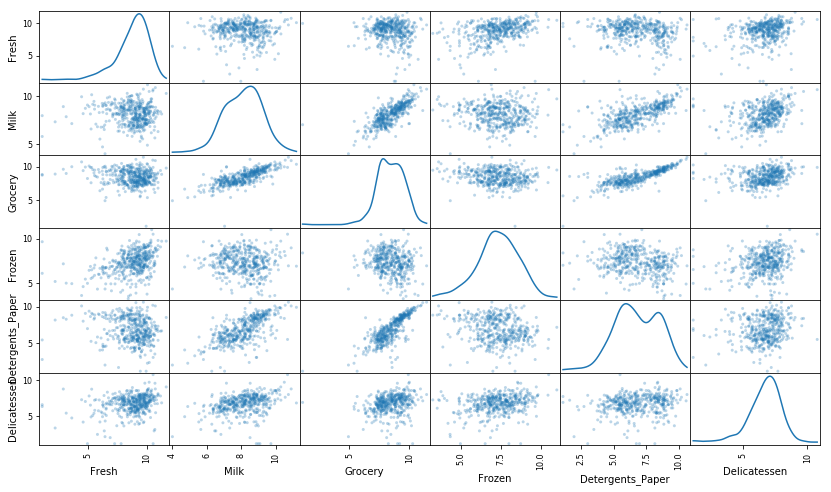

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
1,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
2,10.180096,10.502956,9.999661,8.547528,8.374938,9.712509


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [8]:
l_outliers=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5    
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    for elem in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index:
        l_outliers.append(elem)

# print list to see duplicate indices
print ("Sorted list of outlier indices {}".format(sorted(l_outliers)))

# remove the duplicate indices
l_uniqueoutliers= sorted(list(dict.fromkeys(l_outliers)))
print ("Sorted list of unique outlier indices {}".format(l_uniqueoutliers))

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Sorted list of outlier indices [38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]
Sorted list of unique outlier indices [38, 57, 65, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**
- There are a number of data points that are outliers according to Tukey's method for more than one feature: 65 (2x), 66(2x), 75(2x), 128 (2x), 154 (3x). I would not remove these points, as their existence in different features indicates that these are legitimate extreme shoppers who are exceptional across different categories. Those might form a class of customers on their own, e.g. wholesalers.
- I would not add any points to the outliers list, as we don't really understand why these outliers exist and what their 'normal' shopping behaviour would be. We could rightly exclude them if we found out that these are billing errors, but if those are just extreme shoppers, they should stay and form classes on their own.
- It is clear that outliers in one or more dimensions affect clustering algorithms, but even if i removed some outliers, it is not guaranteed that k-means would find well-fitting clusters. I would rather increase the k-means parameter "number of clusters" such that the outliers are also covered.



## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

array([[-0.17371704,  0.394463  ,  0.45436364, -0.17219603,  0.74551495,
         0.1494356 ],
       [ 0.68513571,  0.16239926,  0.06937908,  0.487691  ,  0.04191162,
         0.50970874],
       [ 0.67351166, -0.03306794,  0.03218274, -0.28481122,  0.21824404,
        -0.64459672],
       [-0.21432619,  0.0185577 ,  0.06448674,  0.80608348,  0.19005006,
        -0.51348977],
       [ 0.00082162, -0.72228834, -0.34799325,  0.03624337,  0.56366476,
         0.19536639],
       [ 0.02927638, -0.54303508,  0.81390826,  0.0174477 , -0.20244363,
         0.02283197]])

1.0


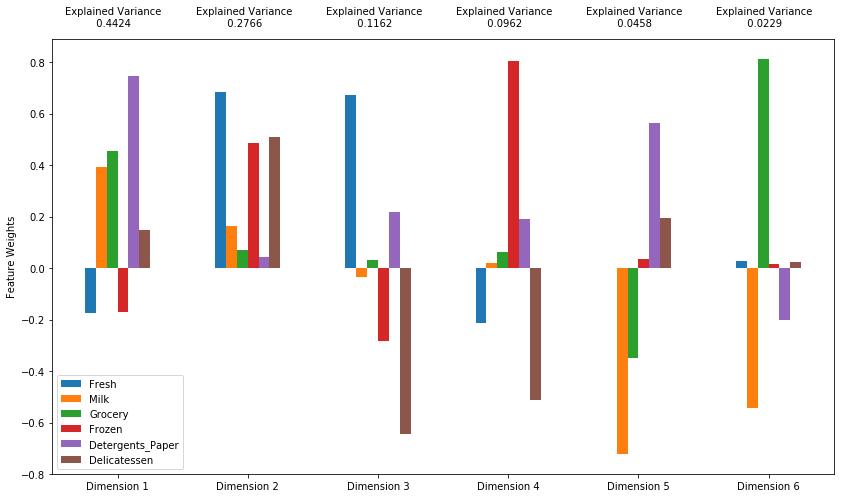

In [9]:
import sklearn.decomposition as skd

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = skd.PCA(n_components=6).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

display(pca.components_)
print(pca.explained_variance_ratio_[0:6].sum())


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
- 44.2% and 27.7%, in sum about 71.9%, of variance in the data is explained in total by the first and second principal component.
- 93.1% of variance in the data is explained by the first four principal components.
- Component 1 explains the largest share of variance in the original data set and the categories "Detergents_Paper", "Grocery" and "Milk" are highly positively correlated with this component / explain a lot of variance, whereas the categories "Frozen", "Fresh" and "Delicatessen" play  only a minor negative role. This component models the regular shopping behaviour of common household goods; the items are in constant demand and are thus bought together.
- Component 2 explains the second largest share of variance and the categories "Fresh", "Frozen", "Delicatessen" are moderately correlated with it and explain the most positive variance. Its composition is complementary to the first component, and it seems to model goods that need special storage conditions, i.e. cool or freezing temperatures. Customers buy goods of categories that they can stored together.
- Component 3 explains the third largest share (11.6%) and it is highly positively correlated with "Fresh" items and highly negatively correlated with "Delicatessen" (it explains a lot of variance in both categories). It seems to model that customers either buy "Fresh" items or they buy  "Delicatessen" (and "Frozen") items. 
- Component 4 explains ca. 9.6% of variance and it is highly positively correlated with the "Frozen" shopping items and somewhat negatively correlated with "Fresh" and "Delicatessen" items. This component explains the most variance in these three features. This component seems to model that customer either buy "Frozen" or "Delicatessen".
- Component 5 explains only ca. 4.6% of variance and it is highly negatively correlated with the "Milk" and "Grocery" shopping items and positively correlated with "Detergents_Paper" items. This component explains the most variance in these four features. 
- Component 6 explains only ca. 2.2% of variance and it is highly negatively correlated with the "Milk" shopping items and positively correlated with "Grocery" items. 


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.8718,-0.5968,0.5109,-0.8300,0.1596,0.0341
1,2.2326,1.3278,1.0282,-1.9855,-0.2291,-0.1969
2,2.8213,3.7157,-1.0248,-0.4243,-0.7254,-0.2129


**Answer**:
*Customer 1(index 8)* has the following profile: few fresh purchases, median milk purchases, below average grocery purchases, very little frozen, below average detergents and paper, below average delicatessen. This customer is a rather small business, maybe a small cafe, as they buy comparatively much milk.

PCA: low component scores as the client is a small business. 

*Customer 2(index 12)* has the following profile: very many purchases in the fresh, milk, grocery and delicatessen categories (a large customer), about median level of detergents and paper purchases, but little frozen goods. This customer could be a medium to large restaurant, but no market, which would buy more evenly, also frozen goods.

PCA: in general higher scores for a bigger customer; high component score on component 1 and 2 but negative score on component 4, as he buys little frozen goods.

*Customer 3(index 23)* has the following profile: very many purchases in the fresh, milk, grocery, frozen and detergents/paper categories (a large customer), but exceptionally many purchases in the delicatessen category. This customer could be a large gourmet restaurant, or a wholesale retailer specialized in delicatessen.

PCA: in general higher scores for a bigger customer; high component score on component 2 and negative component score on component 3 show the "Delicatessen" orientation of this customer.



### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [11]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = skd.PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.8718,-0.5968
1,2.2326,1.3278
2,2.8213,3.7157


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

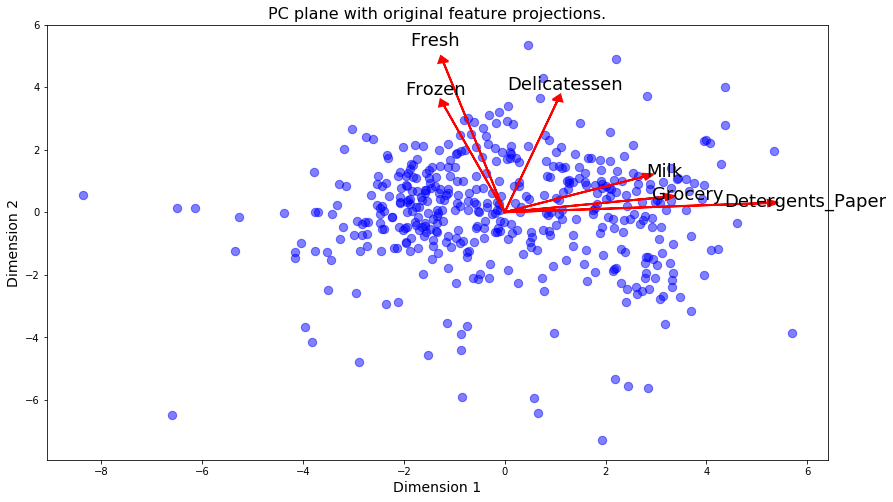

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer**:
'Milk', 'Grocery' and 'Detergents_Paper' are most strongly correlated with Dimension 1, the first component. 'Frozen', 'Fresh' and 'Delicatessen' are strongly correlated with the second component, Dimension 2, but also with Dimension 1 a bit (both positively and negatively) , as you can see from their tilted vectors.

These observations agree with the pca_results obtained earlier, as it corresponds to the factor loadings in the bar chart plot above.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
- Advantages of k-means:
 - computationally inexpensive, fast and thus scalable. 
 - As an iterative algorithm, you can get intermediate results and cut off training after a given number of iterations (before reaching convergence).
 - algorithm will definitely find the number of clusters given as a parameter 
 - it will assign every point to exactly one of the clusters
 
- Advantages of Gaussian Mixture Model clustering algorithm: 
 - "Gaussian Mixture is the fastest algorithm for learning mixture models" ([Source](https://scikit-learn.org/stable/modules/mixture.html#mixture))
 - "As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply."([Source](https://scikit-learn.org/stable/modules/mixture.html#mixture))
 - it can integrate noisy data and outliers, as the estimation process of the Gaussian distributions can assign appropriate membership scores. However, GMMs are not robust and the maximization step is sensitive to outliers (c.f. [Robust estimation in the normal mixture model](https://www.sciencedirect.com/science/article/pii/S0378375805001023)) 
 - individual data points receive a membership score (soft clustering) for each cluster, so one data point can equally belong to two clusters (even if scikit-learn's `fit_predict()` returns only the most likely membership).   
 - if two clusters overlap, they can still be split up by using GMM. So the algorithm does not simply rely on density or distance alone, and allows flexible cluster shapes.

I would use Gaussian Mixture Model as the clustering algorithm for this use case, as we poorly understand the hidden factors determining the shopping behaviour, so GMM might be more suited to discover those. Moreover, GMMs have more flexible cluster shapes that can incorporate outliers and noise.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
import sklearn.mixture as skm
import sklearn.metrics as sksl

n_components=[2]

for nocomp in n_components:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = skm.GMM(n_components=nocomp, covariance_type='full', random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = sksl.silhouette_score(reduced_data, labels=preds, random_state=42)

    print ("Components: {}, Score: {}".format(nocomp, score))


Components: 2, Score: 0.398029003568


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**
Please see the silhouette scores for several cluster numbers below.
- Components: 2, Score: 0.398
- Components: 3, Score: 0.386
- Components: 4, Score: 0.348
- Components: 5, Score: 0.211

2 clusters yield the best silhouette score (0.398)

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

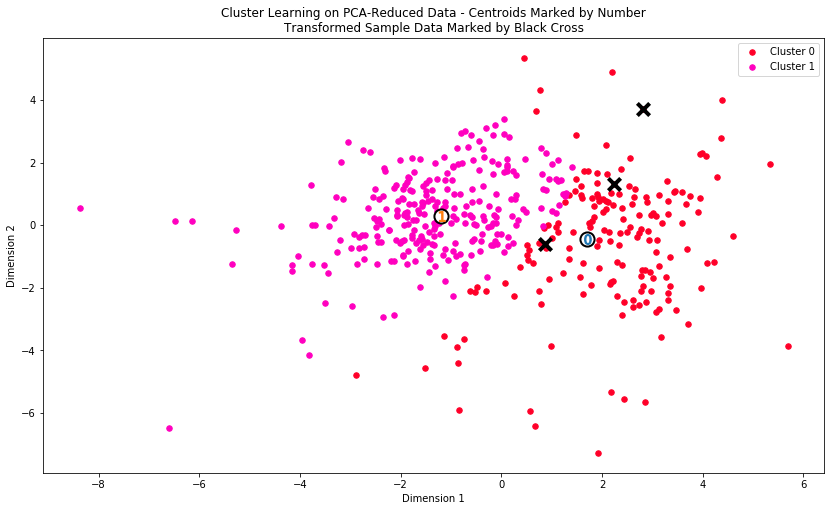

In [20]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,3395.0,6151.0,9780.0,890.0,3113.0,809.0
Segment 1,9421.0,2206.0,2748.0,2119.0,367.0,768.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**
- average customer of segment 0: segment 0 is associated with cluster 0 and this cluster lies in the PC plane mostly on the right part of the plot, which means that its customers are more likely to buy 'Milk', 'Grocery' and 'Detergents_Paper', as those were the main dimensions that loaded positively on Dimension 1 / component 1. This assumption is supported by the observation that the average customer in segment 0 buys amounts of 'Milk' and 'Detergents_Paper' which is about the same as the global mean values in each category for all customers. 'Grocery' is slightly elevated for this customer segment 0 though. Spending in this customer segment on 'Delicatessen', 'Fresh' and 'Frozen' are well below the global mean. Establishments in this segment seem to buy regularly common, everyday household items, but few fresh or frozen goods, so I assume we are talking about cafés, small restaurants, maybe some small markets.
- average customer of segment 1: segment 1 is associated with cluster 1 and this cluster lies in the PC plane mostly on the upper left part of the plot, which means that its customers are more likely to buy 'Fresh' and 'Frozen', as those were the main dimensions that loaded positively on Dimension 2 / component 2. This assumption is supported by the observation that the average customer in segment 1 buys amounts of 'Fresh' and 'Frozen' which is closer to the global mean values in each category for all customers than for segment 0 customers. Spending in both categories is slightly rdeuced for this customer segment 1 though as compared to the global mean. Spending in this customer segment on 'Milk', 'Grocery' and 'Detergents_Paper' are well below the global mean. Establishments in this segment seem to buy mostly goods that are perishable and need to be cooled, so I assume we are talking about ice cream parlors, small greengrocer's shops or gas stations (frozen goods like pizza or ice cream).
- The two segments fail to describe spending on 'Delicatessen' properly, most likely due to the limitation on two PC components, and the consequent loss of explained variance.
- The two average customers in both segments are small to medium businesses in terms of spending, so I assume that they are not wholesalers.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [22]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

('Sample point', 0, 'predicted to be in Cluster', 0)
('Sample point', 1, 'predicted to be in Cluster', 0)
('Sample point', 2, 'predicted to be in Cluster', 0)


**Answer:**
- I think sample point 0 should be in segment 0 as this customer corresponds to the "Grocery" crowd.
- I think sample point 1 is a bit ambiguous, as it belongs to both the "Milk"/"Grocery" and "Fresh" segment, but as it hardly buys frozen goods, it should be in segment 0.
- I think sample point 2 cannot be correctly assigned to the two clusters as it is a heavy "Delicatessen" shopper, but also is high on the "Milk"/"Grocery" and "Fresh" category. 
- All sample points are predicted to be in customer segment 0. I don't think that is helpful for sample point 2.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The change in delivery service times means that the customers will have more delivery lead time for their supplies. This is problematic, if the customer is selling perishable goods or good which need to be stored under special conditions. An increase in delivery lead time is problematic for perishable goods as the customer needs to order more to account for the lead times and to cover their demand, but this poses the risk of spoilage at the customer site. An increase in delivery lead time is also problematic for cooled goods, as the customer needs to provide more storage space to cover the demand during the lead time. This might not be easy as cold stores are limited in space.

So I guess that both segments would be negatively affected. Segment 0 includes customers with many "Milk" items that need to be cooled (and are somewhat perishable). Segment 1 includes customers with "Fresh" items that are likely perishable and "Frozen" items that need to be cooled.
If the wholesaler really needs to test his change in delivery service, they should go for customers in segment 1, as these customers are most reliant on short lead times and quick delivery. If they can cope with longer lead times, the odds are good that all customers can.

If the wholesaler chose customers from segment 0, the A/B test might come up positive, as "Grocery" and "Detergents_Paper" items are not critical, and should not be negatively affected by longer lead times. But this would give the wrong picture.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
The usual way would be to log-transform the new customer data and then use both the trained pca and gmm models to transform/predict their customer segment. I assume that the trained models are still available.

If the available data consists of the customer segments, the old customer data and the new customer data, then a supervised learning algorithm could be used, with customer segment being the target variable and the customer spending in the original 6 categories as the input variables. You would train/validate/test the supervised model using the labeled original data with the known customer segments and then use the trained model to predict the customer segment for the new customer data. As we have all-numeric input, we could use support vector classification or some linear model (e.g. logistic regression).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

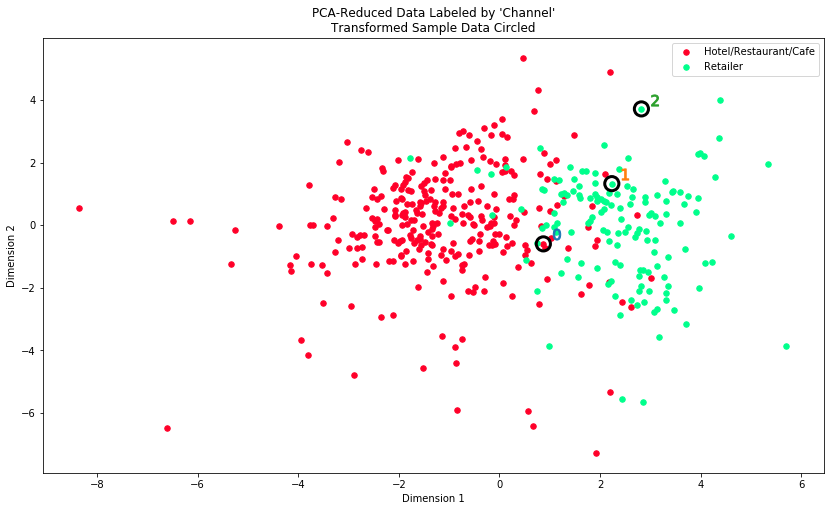

In [23]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**
Segment 0 / cluster 0 fits nicely the channel "Hotel/Restaurant/Cafe" and segment 1 / cluster 1 fits quite well to channel "Retailer", although the match is not 100%. Especially some HoReCa points in the lower middle of the plot were misclassified as retailers by my cluster algorithm.

The channel split is not a pure one - there are no customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution. The real-life segments tend to overlap more than suggested by our cluster algorithm. 

I would consider these classifications as largely consistent with my previous definition of the customer segments:
Segment 0 were cafés, small restaurants, maybe some small markets in my opinion, which is pretty spot on.
Segment 1 were ice cream parlors, small greengrocer's shops or gas stations in my opinion; shops and gas stations certainly qualify as retailers, I'd say.

I would be interested to see whether more PCA components might result in a more accurate match with reality. 
Moreover, the channel split is itself pretty coarse, so I would really like to see more details on the channel feature.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.